# tests to retrieve the openEO processed habitat map via UDP
This scripts shows how to paramaterize the UDP to retrieve the habitat map from openEO for given year, topology, topology level. <br>
<br>

In [23]:
import openeo

In [25]:
# additional imports for visualization and checks
from shapely.geometry import shape
import rasterio
from rasterio.plot import show, show_hist
from matplotlib import pyplot

In [27]:
# establish connection to OpenEO and authenticate
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [28]:
# specify the geometry --> here Slovak Kast Area
polygon =  {"type": "Polygon", 
            "coordinates": [
                [[20.5846406, 48.884577], [21.2011633, 48.884577], [21.2011633, 48.47623], [20.5846406, 48.47623], [20.5846406, 48.884577]
            ]]
           }

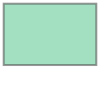

In [31]:
# show the extent
shape(polygon)

## get the habitat map

In [34]:
cube = connection.datacube_from_process(
    process_id="udp_inference_module_alpha0",
    namespace="https://raw.githubusercontent.com/ESA-WEED-project/OpenEO-UDP-UDF-catalogue/refs/heads/main/UDP/json/udp_inference_module_alpha0.json",
    geometry=polygon,   
    topology_level=3,
    reference_data=polygon)

In [36]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./SK_habitat_map_L3_10m_EPSG3035.tif')

OpenEoApiError: [400] BadRequest: java.lang.IllegalArgumentException: No valid sources found for ProjectedExtent(Extent(20.5846406, 48.47623, 21.2011633, 48.884577),EPSG:4326) and 2021-01-01T00:00Z - 2022-01-01T00:00Z. Found 0 input sources. (ref: r-240918a7943e4f50b55c54dff49dbbd1)

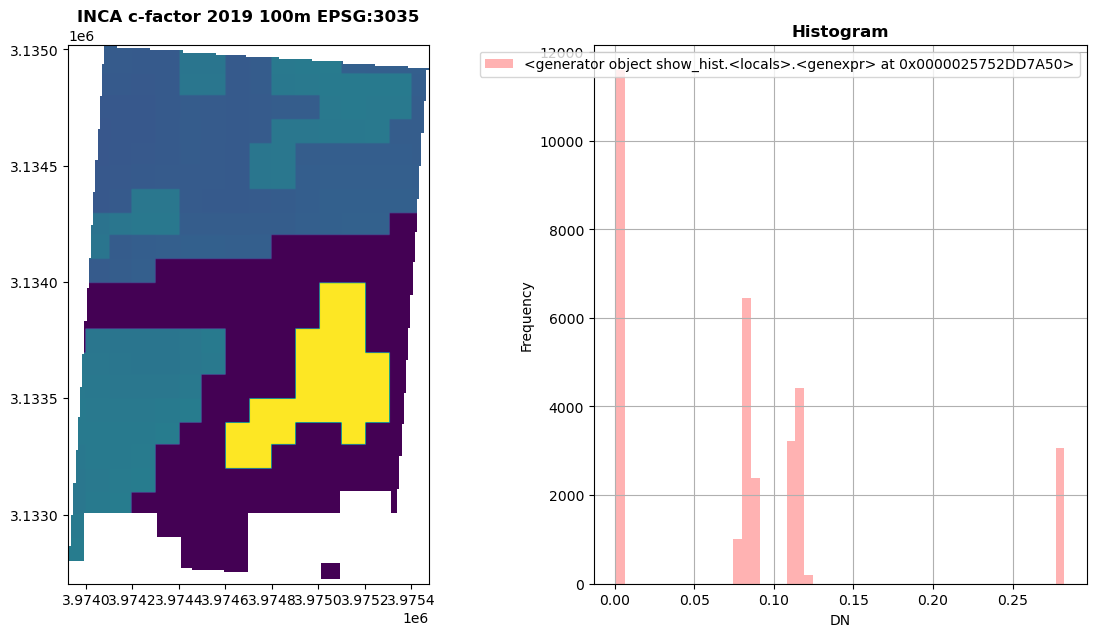

In [8]:
# visu result
with rasterio.open("SK_habitat_map_L3_10m_EPSG3035.tif") as src:
    show(src, with_bounds=True, ax=axrgb, title='SK_habitat_map_L3_10m_EPSG3035')